In [2]:
%load_ext autoreload
%autoreload 2

import pprint
import matplotlib.pyplot as plt
   
from utils import load_tag_dictionary_from_text_file, load_images_and_filenames, evaluate_tagger_on_dataset

from tagger import CLIPTagger

from tagger_global import CLIPTagger as OldTagger

import torch
torch.set_printoptions(sci_mode=False)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
file_path = 'tags_ims/tagdict.txt'
tag_dictionary = load_tag_dictionary_from_text_file(file_path)
print('Tags Dictionary:')
pprint.pp(tag_dictionary)

file_path = 'tags_ims/gt.txt'
gt_dict = load_tag_dictionary_from_text_file(file_path)
# print('\n\n\n GT values:')
# pprint.pp(gt_dict)

# Example usage:
directory = 'tags_ims'
images, filenames = load_images_and_filenames(directory)


Tags Dictionary:
{'animal': ['cat', 'dog', 'dynosaur', 'tiger', 'bear', 'horse'],
 'transport': ['car', 'ship'],
 'scifi': ['dalek', 'tardis', 'robot'],
 'person': ['man', 'woman', 'child'],
 'location': ['indoor', 'outdoor'],
 'food': ['pizza', 'pancake', 'tea', 'cheese', 'oil'],
 'country': ['rome', 'india', 'israel'],
 'games': ['chess', 'baseball'],
 'object': ['umbrella', 'camera', 'clock', 'papers', 'book']}


In [8]:
tagger_1 = CLIPTagger(tag_dictionary)
tagger_1.set_local_logit_prob_th(0.4)

In [6]:
tagger_0 = OldTagger(tag_dictionary)
tagger_0.set_global_logit_prob_th(0.1)

48
GT -  ['dalek', 'book', 'cheese']
Global tagger: {'scifi': ['dalek']}
Local tagger: {'scifi': ['dalek', 'tardis', 'robot'], 'games': ['chess']}


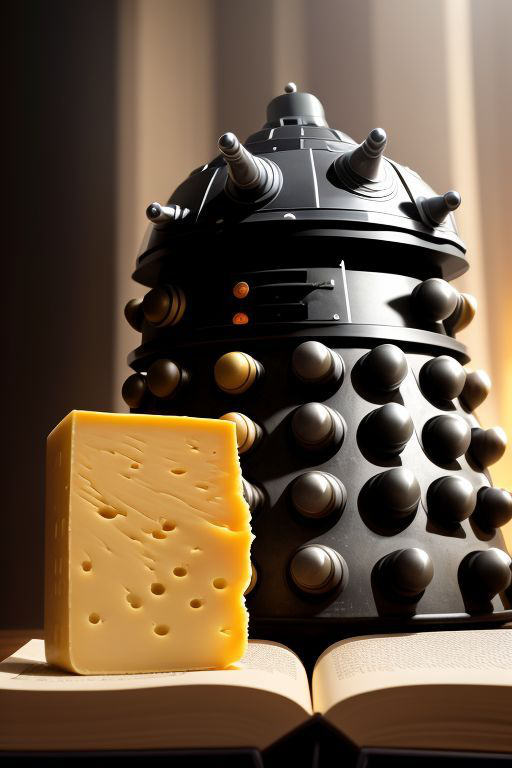

In [12]:
k = filenames.index('dalekbookcheese')

# k = 42

print(k)

print('GT - ', gt_dict[filenames[k]])

print('Global tagger:', tagger_0(images[k]))
print('Local tagger:', tagger_1(images[k]))

images[k]

In [179]:
r = tagger_1.tag_image(images[k], debug_print=True)

animal cat [tensor(16.9840), tensor(18.4330), tensor(19.7970)]
animal dog [tensor(17.7186), tensor(19.1989), tensor(19.7970)]
animal dynosaur [tensor(19.1019), tensor(19.4580), tensor(19.7970)]
animal tiger [tensor(17.5941), tensor(18.8646), tensor(19.7970)]
animal bear [tensor(15.2293), tensor(17.5239), tensor(19.7970)]
animal horse [tensor(19.7158), tensor(20.5079), tensor(19.7970)]
transport car [tensor(18.2343), tensor(19.9141), tensor(21.0622)]
transport ship [tensor(19.9122), tensor(20.0754), tensor(21.0622)]
scifi dalek [tensor(18.2615), tensor(19.0441), tensor(17.6174)]
scifi tardis [tensor(14.6786), tensor(17.1470), tensor(17.6174)]
scifi robot [tensor(18.8443), tensor(19.5401), tensor(17.6174)]
person man [tensor(21.6684), tensor(20.8432), tensor(21.1879)]
person man [tensor(21.6684), tensor(20.8432), tensor(21.1879)] [0.4862461 0.2130391 0.3007148]
person woman [tensor(21.0436), tensor(20.0188), tensor(21.1879)]
person child [tensor(19.4572), tensor(18.8074), tensor(21.1879)

In [10]:
tagger_1.set_local_logit_prob_th(0.4)
f1, report1 = evaluate_tagger_on_dataset(tagger_1, tag_dictionary, gt_dict, images, filenames)

pprint.pp(report1)

('              precision    recall  f1-score   support\n'
 '\n'
 '         cat       0.91      1.00      0.95        10\n'
 '         dog       0.67      1.00      0.80         2\n'
 '    dynosaur       1.00      1.00      1.00         2\n'
 '       tiger       1.00      0.67      0.80         3\n'
 '        bear       1.00      0.67      0.80         3\n'
 '       horse       1.00      0.80      0.89         5\n'
 '         car       0.50      0.20      0.29         5\n'
 '        ship       0.50      1.00      0.67         3\n'
 '       dalek       1.00      1.00      1.00         5\n'
 '      tardis       0.25      0.67      0.36         3\n'
 '       robot       0.60      1.00      0.75         6\n'
 '         man       0.53      0.50      0.52        16\n'
 '       woman       0.75      0.88      0.81        17\n'
 '       child       0.22      1.00      0.36         2\n'
 '      indoor       0.78      0.67      0.72        21\n'
 '     outdoor       0.67      0.83      0.74     

In [11]:
tagger_0.set_global_logit_prob_th(0.1)
f0, report0 = evaluate_tagger_on_dataset(tagger_0, tag_dictionary, gt_dict, images, filenames)
pprint.pp(report0)

('              precision    recall  f1-score   support\n'
 '\n'
 '         cat       0.90      0.90      0.90        10\n'
 '         dog       1.00      1.00      1.00         2\n'
 '    dynosaur       0.67      1.00      0.80         2\n'
 '       tiger       0.50      1.00      0.67         3\n'
 '        bear       1.00      1.00      1.00         3\n'
 '       horse       1.00      1.00      1.00         5\n'
 '         car       1.00      0.40      0.57         5\n'
 '        ship       0.75      1.00      0.86         3\n'
 '       dalek       0.71      1.00      0.83         5\n'
 '      tardis       0.75      1.00      0.86         3\n'
 '       robot       0.75      1.00      0.86         6\n'
 '         man       1.00      0.06      0.12        16\n'
 '       woman       1.00      0.18      0.30        17\n'
 '       child       0.00      0.00      0.00         2\n'
 '      indoor       1.00      0.33      0.50        21\n'
 '     outdoor       0.75      0.09      0.15     

In [140]:
len(filenames)

80

In [141]:
filenames

['cavemen_chess',
 'catpizza',
 'dalekcat',
 'caralps',
 'caesarburn',
 'dynorain',
 'bears',
 'pingpong',
 'chessambass',
 'robotea2',
 'tiger_inv2',
 'kidhorse',
 'fields',
 'pizza',
 'bear',
 'india1',
 'goodcheese',
 'chessqueen',
 'ladyhorse2',
 'tiger_inv1',
 'ship1',
 'ladyhorse',
 'policewoman',
 'abbeyroad',
 'dynorome',
 'fantasy_landscape',
 'oil2',
 'papers',
 'panama',
 'cafe2',
 'weirdcafe',
 'caveart',
 'romegame',
 'cafe1',
 'sovietroom',
 'catspace',
 'robopingpong',
 'india2',
 'catcom1',
 'dalekbook',
 'chnp411jv2bb1',
 'oil1',
 'cafe3',
 'aristo',
 'bear_baseball',
 'pancakegirl',
 'robook',
 'robotea1',
 'chessqueen2',
 'kitcheniso',
 'ohno',
 'dalekbookcheese',
 'ladyhorse4',
 'catsalien',
 'sepoy',
 'tardisisrael',
 'chesshotel',
 'openoffice',
 'japrome',
 'aino',
 'robogirl',
 'dogtea',
 'baseball',
 'toyota',
 'ladyhorse3',
 'cadcat',
 'tardismed',
 'people1',
 'forestcam',
 'cats4',
 'forum',
 'cheese1',
 'cats',
 'chesscoach',
 'tardis2',
 'cats3',
 'catcom2